In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("diabetes.csv")

In [4]:
#Exploratory Data Analysis (EDA)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df.duplicated().sum()

0

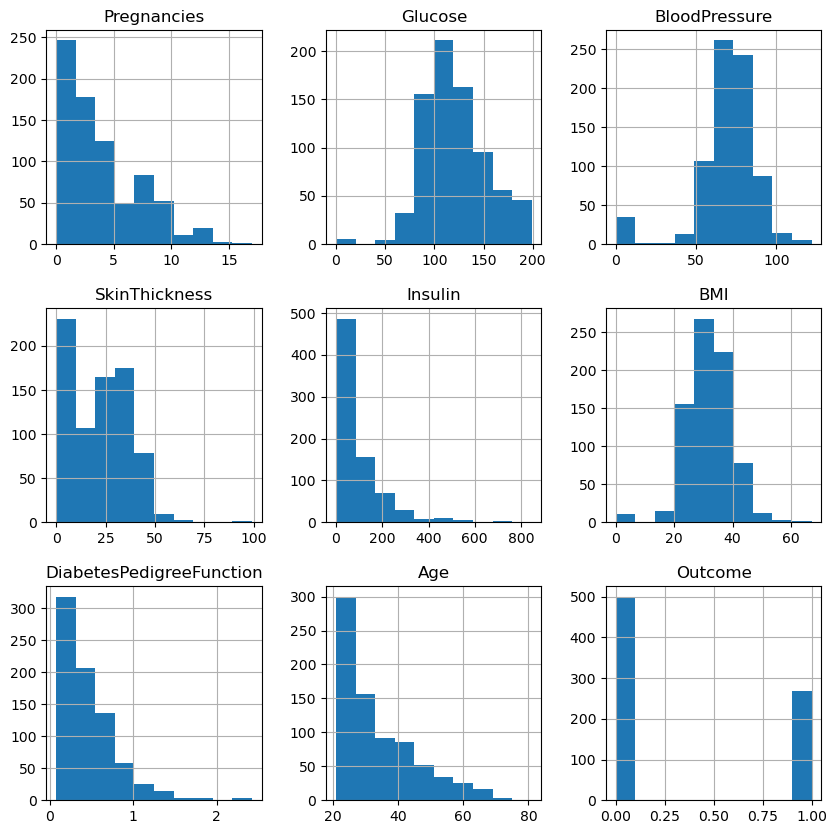

In [11]:
#Visualisasi
df.hist(figsize=(10,10))
plt.show()

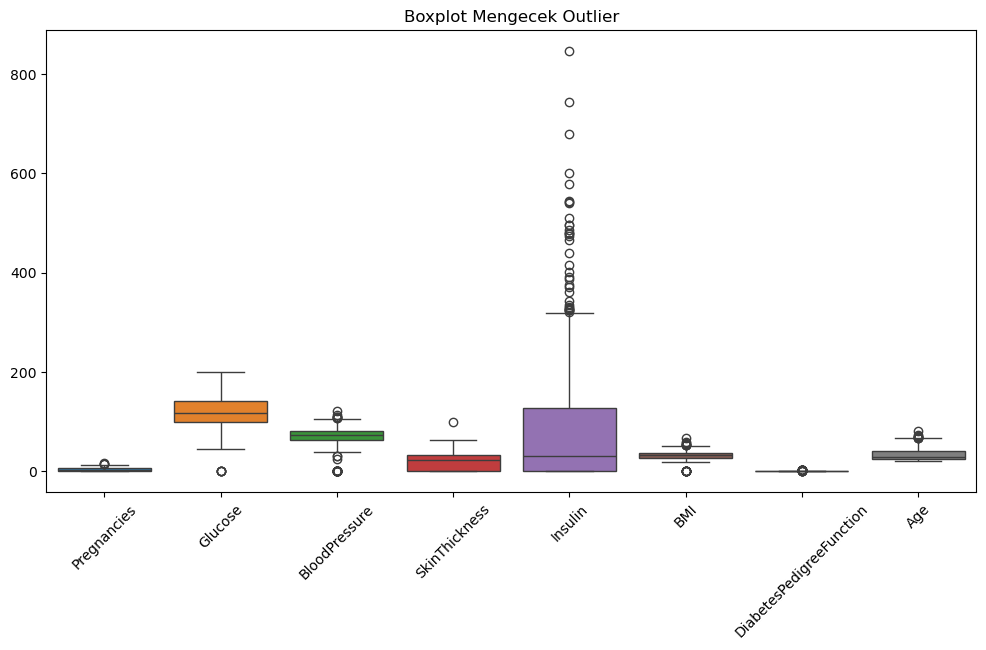

In [12]:
#Buat salinan dengan membuang kolom target
data_outlier=df.drop('Outcome', axis=1)

#Cek Outlier Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=data_outlier)
plt.xticks(rotation=45)
plt.title("Boxplot Mengecek Outlier")
plt.show()

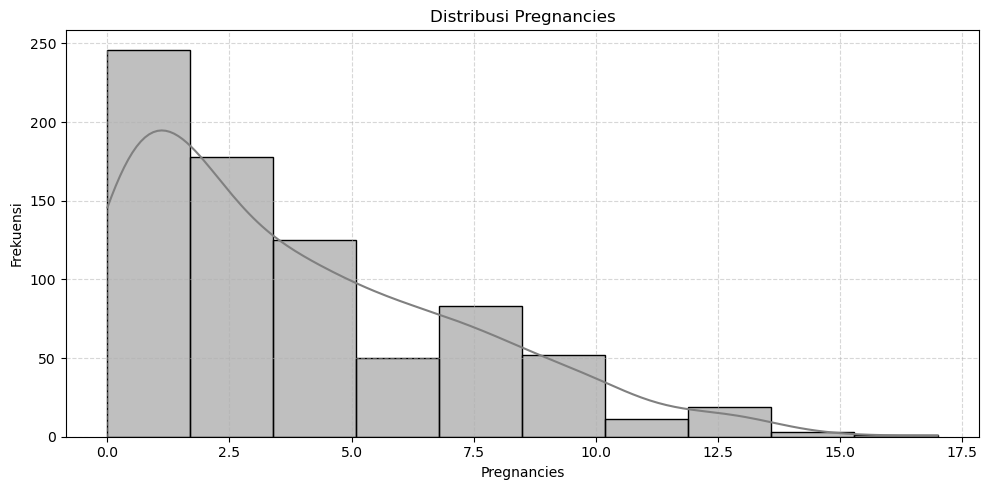

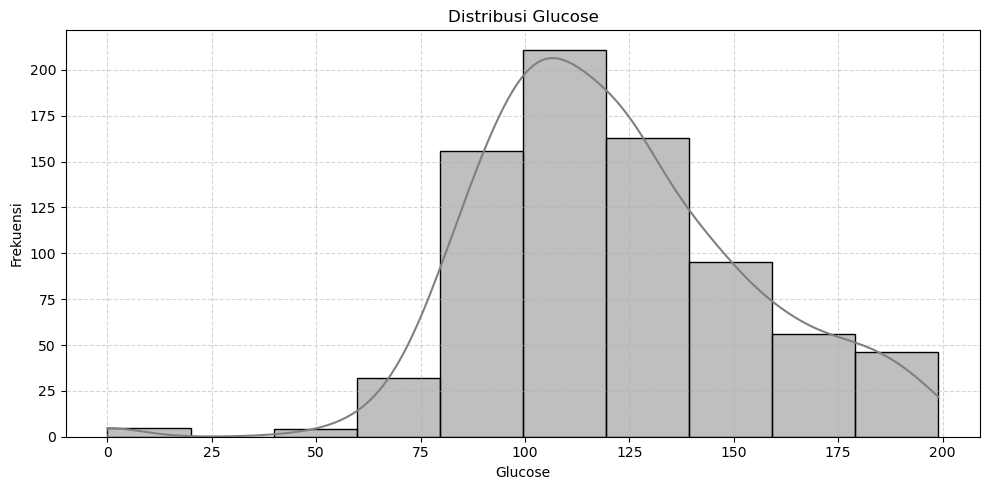

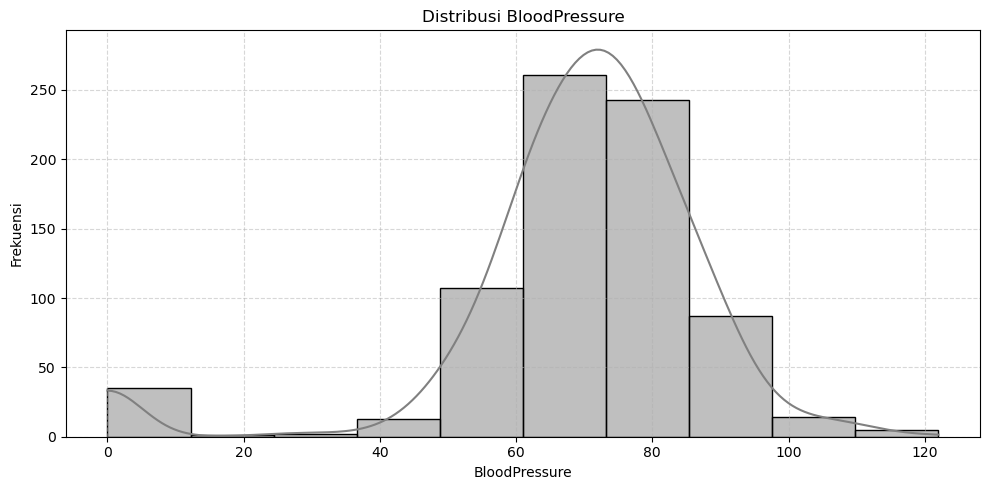

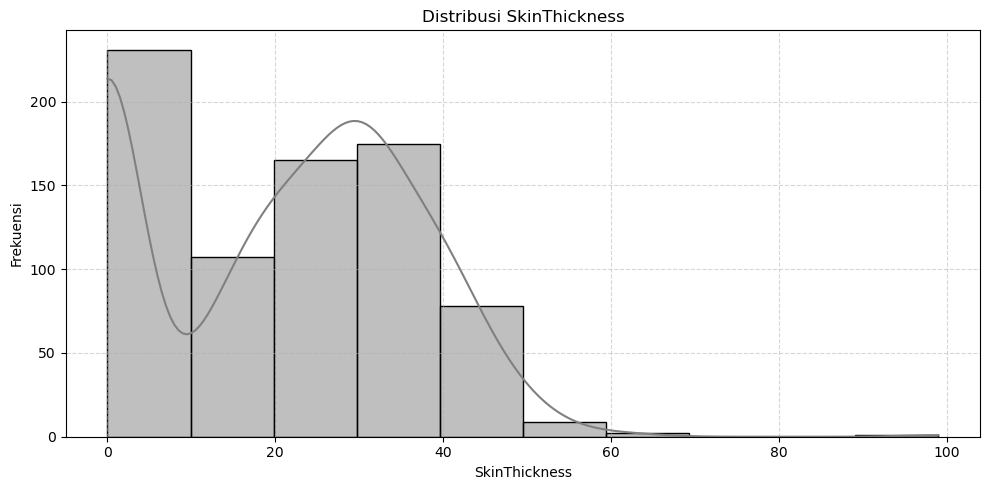

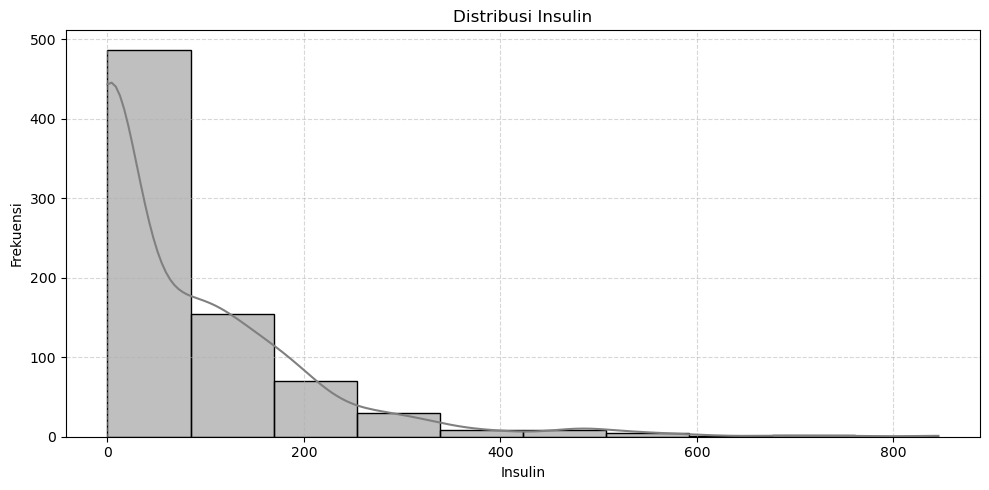

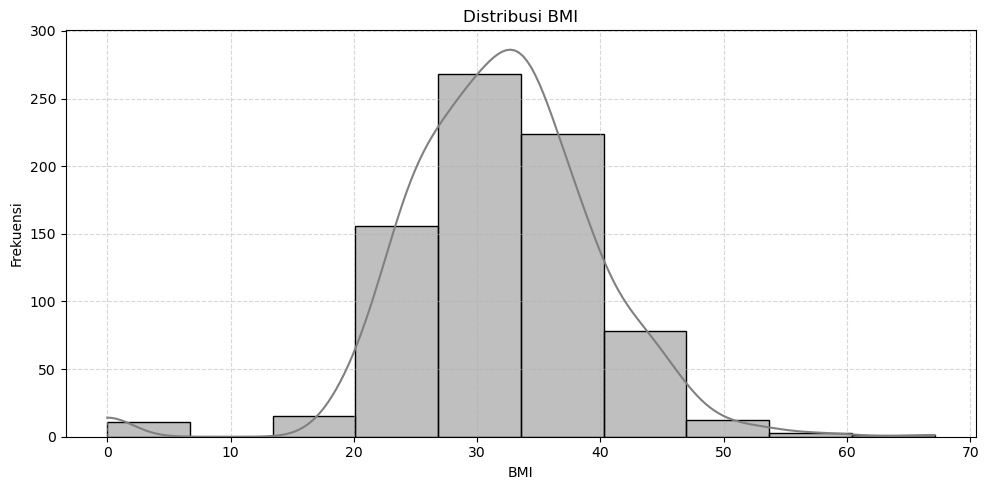

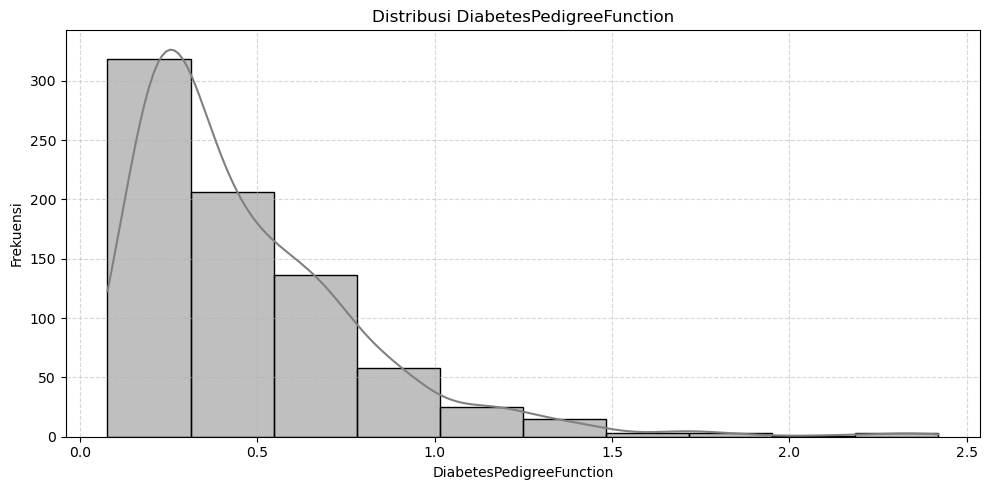

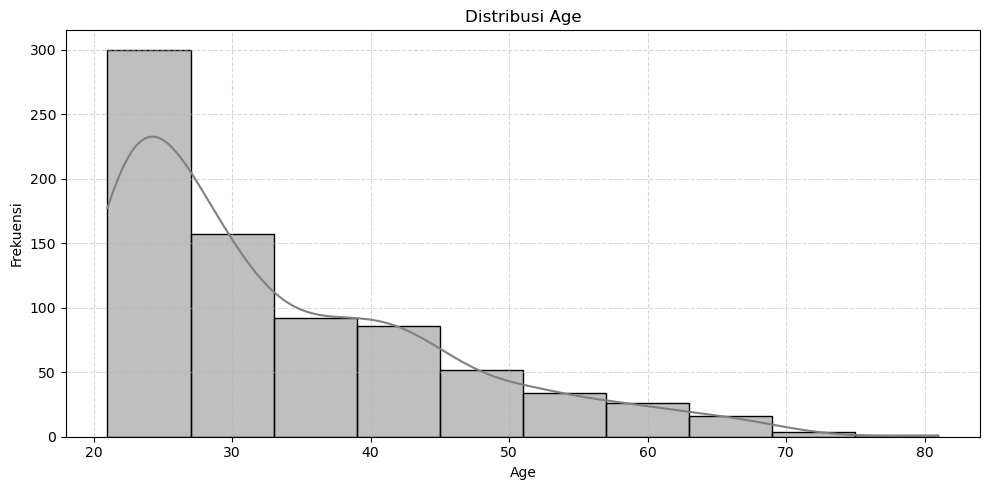

In [13]:
#Distribusi atas data

for kolom in data_outlier.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(data=data_outlier, x=kolom, bins=10, kde=True, color='#808080')
    plt.title(f'Distribusi {kolom}')
    plt.xlabel(kolom)
    plt.ylabel("Frekuensi")
    plt.grid(True, linestyle= "--", alpha=0.5)
    plt.tight_layout()

In [14]:
from scipy.stats import shapiro

def uji_normalitas_shapiro(data):
    hasil = {}
    for kolom in data.columns:
        stat, p = shapiro(data[kolom])
        hasil[kolom] = ("Normal" if p > 0.05 else "Tidak normal", p)
    return hasil

# Jalankan
hasil_uji = uji_normalitas_shapiro(data_outlier)

# Tampilkan hasil
for kolom, (status, p) in hasil_uji.items():
    print(f"{kolom}: {status} (p = {p:.4f})")


Pregnancies: Tidak normal (p = 0.0000)
Glucose: Tidak normal (p = 0.0000)
BloodPressure: Tidak normal (p = 0.0000)
SkinThickness: Tidak normal (p = 0.0000)
Insulin: Tidak normal (p = 0.0000)
BMI: Tidak normal (p = 0.0000)
DiabetesPedigreeFunction: Tidak normal (p = 0.0000)
Age: Tidak normal (p = 0.0000)


In [15]:
def hitung_outlier_persen(data_outlier):
    statistik_outlier = {}
    total_baris = len(data_outlier)
    
    for kolom in data_outlier:
        Q1 = data_outlier[kolom].quantile(0.25)
        Q3 = data_outlier[kolom].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outlier = data_outlier[(data_outlier[kolom] < lower_bound) | (data_outlier[kolom] > upper_bound)]
        jumlah_outlier = len(outlier)
        persen_outlier = (jumlah_outlier / total_baris) * 100
        
        statistik_outlier[kolom] = (jumlah_outlier, persen_outlier)
        
    return statistik_outlier

# Contoh penggunaan:
hasil_outlier = hitung_outlier_persen(data_outlier)
for kolom, (jumlah, persen) in hasil_outlier.items():
    print(f"{kolom}: {jumlah} outlier ({persen:.2f}%)")


Pregnancies: 4 outlier (0.52%)
Glucose: 5 outlier (0.65%)
BloodPressure: 45 outlier (5.86%)
SkinThickness: 1 outlier (0.13%)
Insulin: 34 outlier (4.43%)
BMI: 19 outlier (2.47%)
DiabetesPedigreeFunction: 29 outlier (3.78%)
Age: 9 outlier (1.17%)


In [16]:
#Karena ini data medis maka penanganan outlier harus hati-hati jadi ambil yg 3 persen itu lalu di log
#Utk Blood Pressure cukup liat outlier yang tidak valid aneh atau slaah input saja



In [17]:
#Cek Outlier untuk Blood Pressure pastikan data tidak ada yang salah input, kalau 0 berarti tidak mungkin

print(df['BloodPressure'].value_counts().sort_index().head(10))


BloodPressure
0     35
24     1
30     2
38     1
40     1
44     4
46     2
48     5
50    13
52    11
Name: count, dtype: int64


In [18]:
#Nah karena data Blood Pressure tidak normal maka imputis dengan median
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan).fillna(df['BloodPressure'].median())



In [19]:

print(df['BloodPressure'].value_counts().sort_index().head(10))

BloodPressure
24.0     1
30.0     2
38.0     1
40.0     1
44.0     4
46.0     2
48.0     5
50.0    13
52.0    11
54.0    11
Name: count, dtype: int64


In [20]:
#Cek nilai tertinggi utk 2 outlier lainnya

print("Insulin (top 10 tertinggi):")
print(df['Insulin'].sort_values(ascending=False).head(10))

print("\nDPF (top 10 tertinggi):")
print(df['DiabetesPedigreeFunction'].sort_values(ascending=False).head(10))


Insulin (top 10 tertinggi):
13     846
228    744
247    680
584    600
409    579
286    545
8      543
655    540
753    510
186    495
Name: Insulin, dtype: int64

DPF (top 10 tertinggi):
445    2.420
228    2.329
4      2.288
370    2.137
45     1.893
58     1.781
371    1.731
593    1.699
621    1.698
395    1.600
Name: DiabetesPedigreeFunction, dtype: float64


In [21]:
#Karena gak ada yang aneh maka cukup di log aja 

df['Insulin_log'] = np.log1p(df['Insulin'])
df['DPF_log'] = np.log1p(df['DiabetesPedigreeFunction'])


In [22]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_log,DPF_log
0,6,148,72.0,35,0,33.6,0.627,50,1,0.000000,0.486738
1,1,85,66.0,29,0,26.6,0.351,31,0,0.000000,0.300845
2,8,183,64.0,0,0,23.3,0.672,32,1,0.000000,0.514021
3,1,89,66.0,23,94,28.1,0.167,21,0,4.553877,0.154436
4,0,137,40.0,35,168,43.1,2.288,33,1,5.129899,1.190279
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180,32.9,0.171,63,0,5.198497,0.157858
764,2,122,70.0,27,0,36.8,0.340,27,0,0.000000,0.292670
765,5,121,72.0,23,112,26.2,0.245,30,0,4.727388,0.219136
766,1,126,60.0,0,0,30.1,0.349,47,1,0.000000,0.299364


In [23]:
df_dipakai= df.drop(['Insulin', 'DiabetesPedigreeFunction','Outcome'], axis=1)

df_dipakai

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age,Insulin_log,DPF_log
0,6,148,72.0,35,33.6,50,0.000000,0.486738
1,1,85,66.0,29,26.6,31,0.000000,0.300845
2,8,183,64.0,0,23.3,32,0.000000,0.514021
3,1,89,66.0,23,28.1,21,4.553877,0.154436
4,0,137,40.0,35,43.1,33,5.129899,1.190279
...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,32.9,63,5.198497,0.157858
764,2,122,70.0,27,36.8,27,0.000000,0.292670
765,5,121,72.0,23,26.2,30,4.727388,0.219136
766,1,126,60.0,0,30.1,47,0.000000,0.299364


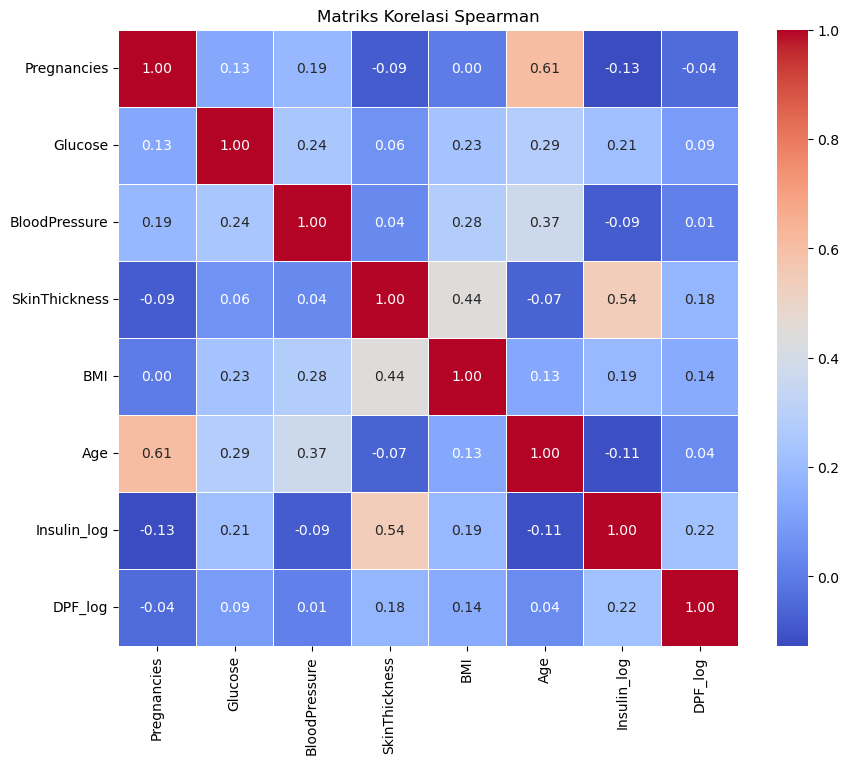

In [24]:
#Karena hampir semua data tidak normal maka pakai uji korelasi Spearman

corr_matrix= df_dipakai.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriks Korelasi Spearman")
plt.show()

| Nilai Korelasi (`r`) | Interpretasi                |
| -------------------- | --------------------------- |
| 0.00 – 0.10          | Tidak ada atau sangat lemah |
| 0.10 – 0.30          | Lemah                       |
| 0.30 – 0.50          | Sedang                      |
| 0.50 – 0.70          | Kuat                        |
| > 0.70               | Sangat kuat                 |

In [25]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Age', 'Insulin_log', 'DPF_log']]  # sesuaikan dengan log yang dipakai
y = df['Outcome']


In [26]:
X

,Glucose,BloodPressure,SkinThickness,BMI,Age,Insulin_log,DPF_log
0,148,72.0,35,33.6,50,0.000000,0.486738
1,85,66.0,29,26.6,31,0.000000,0.300845
2,183,64.0,0,23.3,32,0.000000,0.514021
3,89,66.0,23,28.1,21,4.553877,0.154436
4,137,40.0,35,43.1,33,5.129899,1.190279
...,...,...,...,...,...,...,...
763,101,76.0,48,32.9,63,5.198497,0.157858
764,122,70.0,27,36.8,27,0.000000,0.292670
765,121,72.0,23,26.2,30,4.727388,0.219136
766,126,60.0,0,30.1,47,0.000000,0.299364


In [27]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 7)
(154, 7)
(614,)
(154,)


In [32]:
#Standarisasi Data (Scaling)
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [33]:
#Pakai metode SMOTE yang harus diambil cukup data trainingnya
from imblearn.over_sampling import SMOTE

smote= SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [34]:
#Fit Model 
from sklearn.svm import SVC
model= SVC(probability=True, random_state=42)
model.fit(X_train_resampled, y_train_resampled)


SVC(probability=True, random_state=42)

In [35]:
#Prediksi  pada test set

y_pred = model.predict(X_test_scaled)

In [41]:
#Evaluasi akurasi, precision, recall, f1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Akurasi :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi : 0.7467532467532467
Precision : 0.6119402985074627
Recall : 0.7592592592592593
F1 Score : 0.6776859504132231

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79       100
           1       0.61      0.76      0.68        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.75      0.75       154



| Metrik    | Nilai | Makna                                                                           |
| --------- | ----- | ------------------------------------------------------------------------------- |
| Accuracy  | 75%   | 3 dari 4 prediksi benar                                                         |
| Recall    | 80%   | Hampir semua penderita diabetes berhasil terdeteksi                             |
| Precision | 61%   | Tapi model juga salah memprediksi orang sehat sebagai diabetes (false positive) |
| F1 Score  | 69%   | Keseimbangan moderat antara recall dan precision                                |


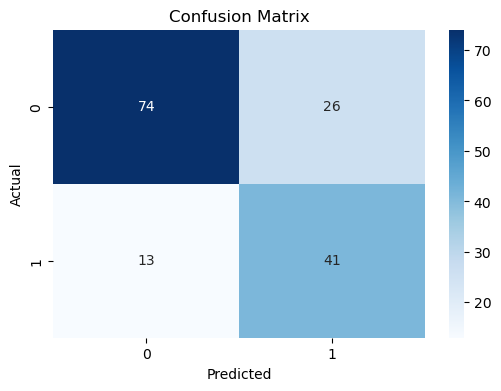

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


|                        | **Predicted 0 (Negatif)** | **Predicted 1 (Positif)** |
| ---------------------- | ------------------------- | ------------------------- |
| **Actual 0 (Negatif)** | ✅ **73** (True Negative)  | ❌ **27** (False Positive) |
| **Actual 1 (Positif)** | ❌ **11** (False Negative) | ✅ **43** (True Positive)  |


In [43]:
#ROC CUrve

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

model = SVC(probability=True)  # Perlu ini agar bisa ambil probabilitas
model.fit(X_train_resampled, y_train_resampled)


SVC(probability=True)

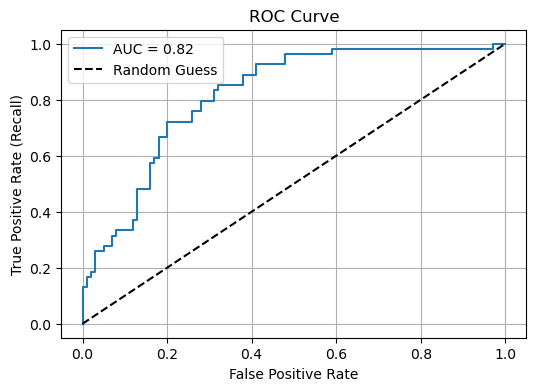

In [44]:
# Dapatkan probabilitas prediksi
y_scores = model.predict_proba(X_test_scaled)[:, 1]  # ambil probabilitas kelas 1

# Hitung FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Hitung AUC (Area Under Curve)
auc = roc_auc_score(y_test, y_scores)

# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [45]:

#Simpan Model
import joblib

joblib.dump(model, 'model_svm_pkl')
joblib.dump(scaler, 'scaler_pkl')

['scaler_pkl']